# 4.10 Task Part 1 (notebook 7)

## Table of Contents
### Calculating the percentages of customers in each region
### Calculating percentages of customers in above and below average income groups
### Horizontal bar chart for department sales by normalized regions (redo from previous notebook)
### Horizontal bar chart on orders per department on normalized income levels (redo from previous notebook)
### 4.10 Task Part 1 -- Question 5 continued (profiling variables)
### Create profile variable based on age, income, and dependent status
### 4.10 Task Part 1 -- Question 6 (create visualizations to show profile distributions)
### Horizontal bar charts for each new customer profile

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating path

path = r'C:\Users\Karen\Documents\Personal\Data Analytics\Career Foundry\Achievement 4\Instacart Basket Analysis'

In [3]:
# Importing data set

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [4]:
# Removing the limit to columns and rows displayed so I can see all the rows and columns going forward

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [5]:
# Checking imported data frame

df.head(50)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_order_price,spending_flag,median_days_since_prior_order,regularity_flag,Gender,State,Age,date_joined,number_of_dependents,fam_status,income,_merge,Region,exclusion_flag,age_range,department,order_total,income_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Young,beverages,31.6,below average
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Young,beverages,35.4,below average
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Young,beverages,28.2,below average
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Young,beverages,26.0,below average
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Young,beverages,57.0,below average
5,3367565,1,6,2,7,19.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Young,beverages,25.0,below average
6,550135,1,7,1,9,20.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Young,beverages,29.0,below average
7,3108588,1,8,1,14,14.0,196,2,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Young,beverages,40.2,below average
8,2295261,1,9,1,16,0.0,196,4,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Young,beverages,40.2,below average
9,2550362,1,10,4,8,30.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Young,beverages,63.1,below average


In [6]:
df.shape

(30964564, 37)

In [7]:
# checking to see what the numbers of customers are in each region

df['Region'].value_counts()

Region
South        10311139
West          7927227
Midwest       7261513
Northeast     5464685
Name: count, dtype: int64

In [8]:
10311139+7927227+7261513+5464685

30964564

In [9]:
# Calculating the percentages of customers in each region
# South:

10311139/30964564*100

33.299803607762726

In [10]:
# West

7927227/30964564*100

25.60096437979879

In [11]:
# Midwest

7261513/30964564*100

23.45104229466948

In [12]:
# Northeast

5464685/30964564*100

17.648189717768993

In [13]:
# Checking what number of customers are above or below average

df['income_flag'].value_counts()

income_flag
below average    16624881
above average    14339683
Name: count, dtype: int64

In [14]:
16624881+14339683

30964564

In [15]:
# Calculating percentages of customers in each income group
# below average

16624881/30964564*100

53.690021277225156

In [16]:
# above average

14339683/30964564*100

46.309978722774844

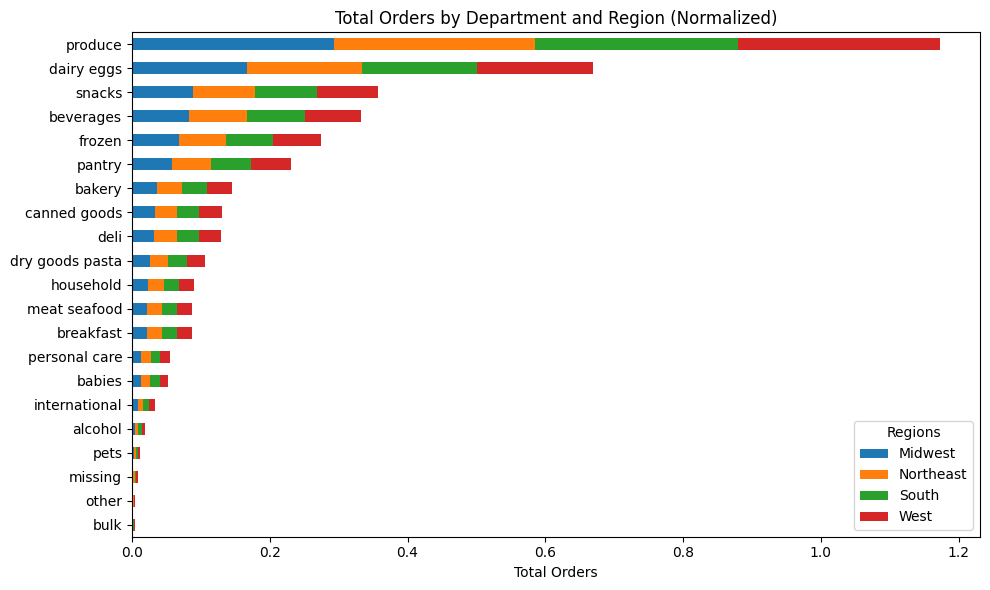

In [17]:
# Redo chart from previous on making a bar chart for department sales by normalized regions

# Group by 'department' and 'Region', and count the occurrences
department_region_counts = df.groupby(['department', 'Region']).size().unstack()

# Normalize the data along the vertical axis (columns/Region)
normalized_data = department_region_counts.div(department_region_counts.sum(axis=0), axis=1)

# Sort the data by total orders in descending order
total_orders = department_region_counts.sum(axis=1)
sorted_data = normalized_data.loc[total_orders.sort_values(ascending=False).index]

# Plot the stacked horizontal bar chart with normalized regions
ax = sorted_data.plot.barh(stacked=True, figsize=(10, 6))

# Reverse the order of the y-axis
plt.gca().invert_yaxis()

# Add labels and a title
plt.xlabel('Total Orders')
plt.ylabel('')
plt.title('Total Orders by Department and Region (Normalized)')

# Add a legend with a title
plt.legend(title='Regions', loc='lower right')

# Adjust the layout to ensure everything fits
plt.tight_layout()

# Save the chart as an image with adjusted bbox_inches
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_by_department_and_region_normalized.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()


In [18]:
normalized_data

Region,Midwest,Northeast,South,West
department,,,,
alcohol,0.004688,0.004578,0.004734,0.004636
babies,0.013185,0.013306,0.013530,0.012921
bakery,0.036047,0.036471,0.036041,0.036350
beverages,0.082487,0.084713,0.083349,0.082068
breakfast,0.021504,0.021576,0.021644,0.021902
bulk,0.001092,0.001025,0.001084,0.001103
canned goods,0.032701,0.032378,0.032728,0.032826
dairy eggs,0.166975,0.167368,0.167102,0.167405
deli,0.032289,0.032646,0.032355,0.032464


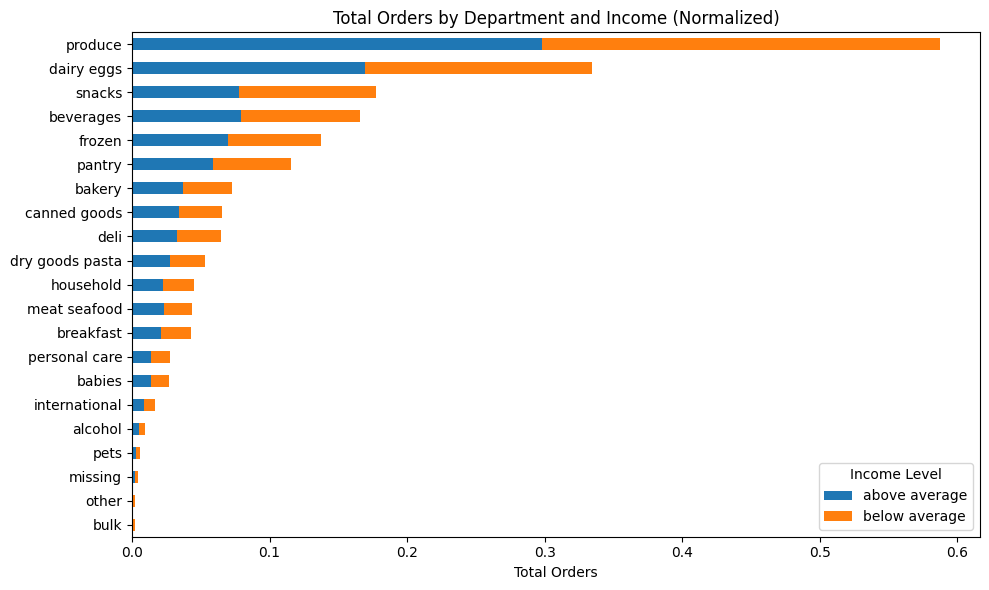

In [19]:
# Redo chart from my previous notebook on orders per department on normalized income levels

# Group by 'department' and 'income_flag', and count the occurrences
department_income_counts = df.groupby(['department', 'income_flag']).size().unstack()

# Normalize the data along the vertical axis (columns/income_flag)
normalized_data = department_income_counts.div(department_income_counts.sum(axis=0), axis=1)

# Sort the data by total orders in descending order
total_orders = department_income_counts.sum(axis=1)
sorted_data = normalized_data.loc[total_orders.sort_values(ascending=False).index]

# Plot the stacked horizontal bar chart with normalized regions
ax = sorted_data.plot.barh(stacked=True, figsize=(10, 6))

# Reverse the order of the y-axis
plt.gca().invert_yaxis()

# Add labels and a title
plt.xlabel('Total Orders')
plt.ylabel('')
plt.title('Total Orders by Department and Income (Normalized)')

# Add a legend with a title
plt.legend(title='Income Level', loc='lower right')

# Adjust the layout to ensure everything fits
plt.tight_layout()

# Save the chart as an image with adjusted bbox_inches
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_by_department_and_income_normalized.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()


In [20]:
normalized_data

income_flag,above average,below average
department,,
alcohol,0.004856,0.004511
babies,0.013853,0.012737
bakery,0.037148,0.035377
beverages,0.079261,0.086336
breakfast,0.020952,0.022280
bulk,0.000996,0.001153
canned goods,0.034145,0.031425
dairy eggs,0.169452,0.165252
deli,0.032512,0.032338


## Now I want to make a profiling variable to run tests on (this corresponds to #5 in the 4.10 task part 1)
### I will make a profiling variable on age, income, and dependents. The combinations necessary for using these 3 variables will be 12. I feel 12 groupings is plenty to do tests on, this is why I am not including marrital status because that would result in 24 different groupings.

In [21]:
# Deriving a new column for my profiling flag

df.loc[(df['age_range'] == 'Young') & (df['income_flag'] == 'below average') & (df['number_of_dependents'] == 0), 'customer_profile'] = 'young, below average income, no dependents'

In [22]:
df.loc[(df['age_range'] == 'Young') & (df['income_flag'] == 'above average') & (df['number_of_dependents'] == 0), 'customer_profile'] = 'young, above average income, no dependents'

In [23]:
df.loc[(df['age_range'] == 'Young') & (df['income_flag'] == 'below average') & (df['number_of_dependents'] > 0), 'customer_profile'] = 'young, below average income, has dependents'

In [24]:
df.loc[(df['age_range'] == 'Young') & (df['income_flag'] == 'above average') & (df['number_of_dependents'] > 0), 'customer_profile'] = 'young, above average income, has dependents'

In [25]:
df.loc[(df['age_range'] == 'Middle-Aged') & (df['income_flag'] == 'below average') & (df['number_of_dependents'] == 0), 'customer_profile'] = 'middle-aged, below average income, no dependents'

In [26]:
df.loc[(df['age_range'] == 'Middle-Aged') & (df['income_flag'] == 'above average') & (df['number_of_dependents'] == 0), 'customer_profile'] = 'middle-aged, above average income, no dependents'

In [27]:
df.loc[(df['age_range'] == 'Middle-Aged') & (df['income_flag'] == 'below average') & (df['number_of_dependents'] > 0), 'customer_profile'] = 'middle-aged, below average income, has dependents'

In [28]:
df.loc[(df['age_range'] == 'Middle-Aged') & (df['income_flag'] == 'above average') & (df['number_of_dependents'] > 0), 'customer_profile'] = 'middle-aged, above average income, has dependents'

In [29]:
df.loc[(df['age_range'] == 'Older') & (df['income_flag'] == 'below average') & (df['number_of_dependents'] == 0), 'customer_profile'] = 'older, below average income, no dependents'

In [30]:
df.loc[(df['age_range'] == 'Older') & (df['income_flag'] == 'above average') & (df['number_of_dependents'] == 0), 'customer_profile'] = 'older, above average income, no dependents'

In [31]:
df.loc[(df['age_range'] == 'Older') & (df['income_flag'] == 'below average') & (df['number_of_dependents'] > 0), 'customer_profile'] = 'older, below average income, has dependents'

In [32]:
df.loc[(df['age_range'] == 'Older') & (df['income_flag'] == 'above average') & (df['number_of_dependents'] > 0), 'customer_profile'] = 'older, above average income, has dependents'

In [33]:
df['customer_profile'].value_counts(dropna = False)

customer_profile
middle-aged, above average income, has dependents    6175368
young, below average income, has dependents          5959219
middle-aged, below average income, has dependents    4697192
older, above average income, has dependents          4339196
middle-aged, above average income, no dependents     2095077
young, below average income, no dependents           1982009
older, below average income, has dependents          1834390
middle-aged, below average income, no dependents     1559088
older, above average income, no dependents           1428975
older, below average income, no dependents            592983
young, above average income, has dependents           219518
young, above average income, no dependents             81549
Name: count, dtype: int64

In [34]:
6175368+5959219+4697192+4339196+2095077+1982009+1834390+1559088+1428975+592983+219518+81549

30964564

## 6. Create an appropriate visualization to show the distribution of profiles.

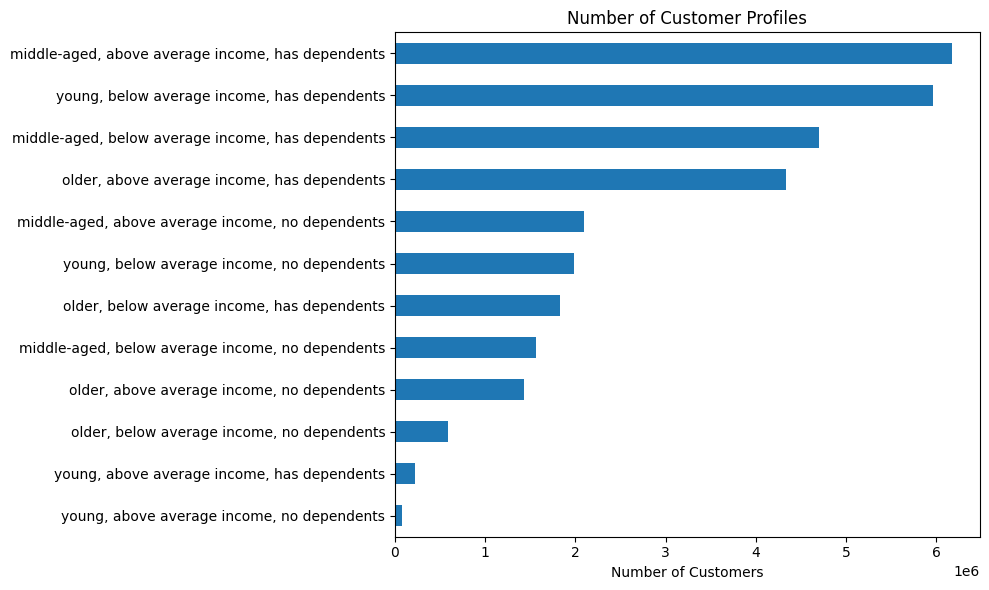

In [35]:
# Making a horizontal bar chart for customer profiles

fig, ax = plt.subplots(figsize=(10, 6)) 
df['customer_profile'].value_counts().plot.barh(ax=ax)

# Add labels and a title
plt.xlabel('Number of Customers')
plt.ylabel('')
plt.title('Number of Customer Profiles')

# Reverse the order of the y-axis
plt.gca().invert_yaxis()

# Adjust the layout to ensure everything fits
plt.tight_layout()

# Save the chart as an image with adjusted bbox_inches
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'numbers_of_customer_profiles.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()


In [36]:
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))